In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [126]:
import warnings
warnings.filterwarnings("ignore")

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from tabulate import tabulate

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [21]:
import scipy.stats as st
from scipy.stats import kurtosis
from scipy.stats import skew

In [6]:
#get the dataset
dataset = pd.read_csv("../data/dataset.csv")

In [7]:
dataset.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
dataset.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [11]:
#check high level null values
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Total bedrooms have null values. What would this practically mean in order to choose the best way to deal with them?

### Correlations

In [ ]:
#calculate the correlations
corr_mat=dataset.corr(method='pearson')

In [52]:
corr_mat

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

In [51]:
#do a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

<AxesSubplot:>

In [53]:
#see correlations with the median house value
corr_mat["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

NOTES:

1. Median house value is highly correlated with the median_income (people buy houses they can afford...)
2. Total bedrooms are highly correlated with total rooms
3. Population is highly correlated with total rooms (more rooms, more people...)
4. Number of households is highly correlated with total rooms (more households, more rooms...)
5. Total rooms is moderately correlated with houging median age (probably changes over time meant certain buildings could be built depending no the era?). Same goes for total bedrooms, population, and households

### Individual features exploration

In [158]:
def explore(dataset, column):
    """
    This function helps with the initial high level exploration of a column so we don't keep repeating the steps
    """
    
    #print column's data type
    if dataset[column].dtype.name in ['object', 'category']:
        dtype_group = 'Qualitative'
    elif dataset[column].dtype.name not in ['object', 'category']:
        dtype_group = 'Quantitative'
        
    print(tabulate([['Data type of column ', dataset[column].dtype],
                   ['Data type group ', dtype_group]], headers=['Exploration', 'Results'], tablefmt='orgtbl'))
    print()
    print()
    print()
    
    #missing values
    missing_values = str(dataset[column].isnull().sum()) + " missing values out of " + str(len(dataset['median_house_value']))
    missing_percentages = str(dataset[column].isnull().sum() / len(dataset['median_house_value']) * 100) + "%"
    print(tabulate([['Missing values ', missing_values], ['Missing values ', missing_percentages]], 
                   headers=['Exploration', 'Results'], tablefmt='orgtbl'))
    print()
    print()
    print()
    
    #distribution
    print("Distribution of the data:")
    fig = px.histogram(dataset, x=column)
    fig.show()
    
    #if column is qualitative
    if dtype_group == 'Qualitative':
        
        #print the values counts
        print(tabulate([['Value counts ', dataset[column].value_counts()]], headers=['Exploration', 'Results'], tablefmt='orgtbl'))
        print()
        print()
        print()
        
        #print proportions
        print(tabulate([['Value counts percentages ', dataset[column].value_counts(normalize = True) * 100 ]], headers=['Exploration', 'Results'], tablefmt='orgtbl'))
        print()
        print()
        dataset[column] = dataset[column].astype('category')
        
        #what are some measures of central tendencies for each variable value
        mean_calc = dataset.groupby(column).median_house_value.mean().reset_index()
        print(tabulate([['The average sales variable value is ', mean_calc]], headers=['Exploration', 'Results'], tablefmt='orgtbl'))
        print()
        print()
        print()
        
        std_calc = dataset.groupby(column).median_house_value.std().reset_index()
        print(tabulate([['The standard deviation / spread of the sales is ', std_calc]], headers=['Exploration', 'Results'], tablefmt='orgtbl'))
        print()
        print()
        print()
        
        #let's see how this variable changes on the scatterplot
        plt.figure(figsize = (10, 8))
        sns.scatterplot(x = dataset['longitude'], y = dataset['latitude'], hue = dataset[column])
        plt.show()
        
    elif dtype_group == 'Quantitative':
        
        #creating a boxplot highlighting the mean, median etc
        red_circle = dict(markerfacecolor='red', marker='o')
        mean_shape = dict(markerfacecolor='green', marker='D', markeredgecolor='green')
        plt.figure(figsize = (15, 5))
        plt.boxplot(x=dataset[column][~dataset[column].isnull()], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape, notch=True)
        plt.show()
        print()
        print()
        
        #see the distribution of the loan terms
        #print the values counts
        print(tabulate([['The description of the column:', dataset[column].describe()]], headers=['Exploration', 'Results']))
        print()
        print()
        print()
        
        #calculate the kurtosis
        kurtosis_calculation = kurtosis(dataset[column][~dataset[column].isnull()], fisher=False)
        if kurtosis_calculation > 3:
            conclusion = "The distribution is leptokurtic. The distribution has a sharp peak."
        elif kurtosis_calculation == 3:
            conclusion = "The distribution is mesokurtic. The distribution has a flat peak."
        elif kurtosis_calculation < 3:
            conclusion = "The distribution is platykurtic. The distribution follows a normal distribution."
        
        print(tabulate([['The kurtosis is  ', kurtosis_calculation], ['Conclusion: ', conclusion]], headers=['Exploration', 'Results']))
        print()
        print()
        print()
        
        #calculate the skeweness
        skewness_calculation = skew(dataset[column][~dataset[column].isnull()])
        if skewness_calculation >= -0.5 and skewness_calculation <= 0.5:
            conclusion = "The distribution has low skewness."
        elif (skewness_calculation >= -1 and skewness_calculation <= -0.5) or (skewness_calculation >= 0.5 and skewness_calculation <= 1):
            conclusion = "The distribution has moderate skewness."
        else:
            conclusion = "The distribution has high skewness"
            
        print(tabulate([['The skewness is  ', skewness_calculation], ['Conclusion: ', conclusion]], headers=['Exploration', 'Results']))
        print()
        print()
        print()
        
        
        #test column for normality
        test_normality = lambda x: st.shapiro(x.fillna(0))[1] < 0.01
        normal = pd.DataFrame(dataset[column][~dataset[column].isnull()])
        normal = normal.apply(test_normality)
        print(tabulate([['The column normality  ', not normal.all()]], headers=['Exploration', 'Results']))
        print()
        print()
        print()
        
        #show the correlation for this column and others
        print(tabulate([['The Correlations of column with others  ', corr_mat.loc[column]]], headers=['Exploration', 'Results']))
        print()
        print()
        print()
        
        # Distribution in relation to the target variable:
        plt.figure(figsize = (10, 8))
        plt.title("Distribution of " + column + "in relation to median house value")
        sns.scatterplot(x = dataset[column], y = dataset['median_house_value'])
        plt.show()
        
        #let's see how this variable changes on the scatterplot
        plt.figure(figsize = (10, 8))
        plt.title("Distribution of " + column + " as size on scatter plot")
        sns.scatterplot(x = dataset['longitude'], y = dataset['latitude'], 
                        size= dataset[column], sizes=(20, 200), hue = dataset[column])
        plt.show()


###### [New feature] Latitude & Longitude

We can use the latitude and longitude as x and y values of a scatterplot

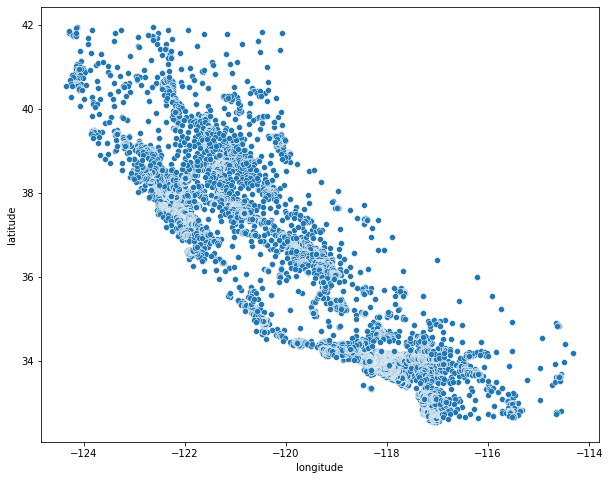

In [139]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = dataset['longitude'], y = dataset['latitude'])
plt.show()

###### Longitude

| Exploration         | Results      |
|---------------------+--------------|
| Data type of column | float64      |
| Data type group     | Quantitative |



| Exploration    | Results                       |
|----------------+-------------------------------|
| Missing values | 0 missing values out of 20640 |
| Missing values | 0.0%                          |



Distribution of the data:


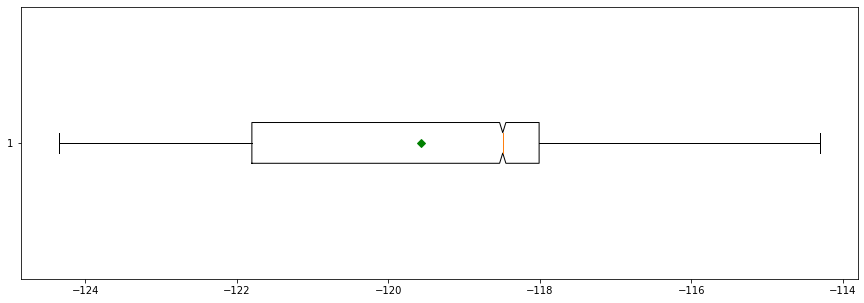



Exploration                     Results
------------------------------  -------------------------------
The description of the column:  count    20640.000000
                                mean      -119.569704
                                std          2.003532
                                min       -124.350000
                                25%       -121.800000
                                50%       -118.490000
                                75%       -118.010000
                                max       -114.310000
                                Name: longitude, dtype: float64



Exploration      Results
---------------  --------------------------------------------------------------------------------
The kurtosis is  1.6698791551574637
Conclusion:      The distribution is platykurtic. The distribution follows a normal distribution.



Exploration      Results
---------------  ----------------------------------
The skewness is  -0.29777956498586855
Conclusion:      The

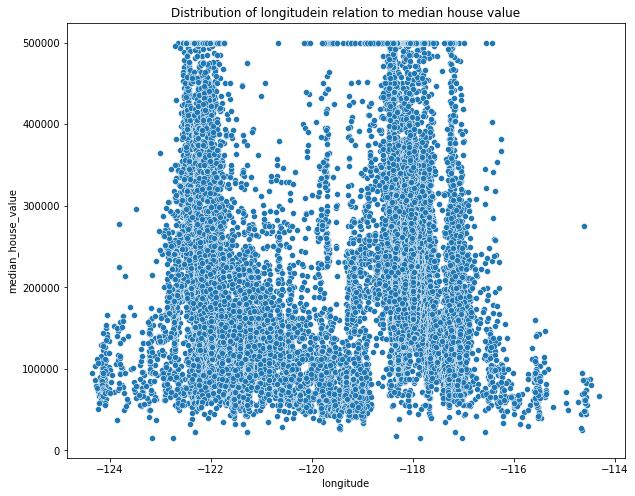

In [144]:
explore(dataset, 'longitude')

NOTES:

1. The points are around the same area as the std is very low.

###### Latitude

| Exploration         | Results      |
|---------------------+--------------|
| Data type of column | float64      |
| Data type group     | Quantitative |



| Exploration    | Results                       |
|----------------+-------------------------------|
| Missing values | 0 missing values out of 20640 |
| Missing values | 0.0%                          |



Distribution of the data:




Exploration                     Results
------------------------------  ------------------------------
The description of the column:  count    20640.000000
                                mean        35.631861
                                std          2.135952
                                min         32.540000
                                25%         33.930000
                                50%         34.260000
                                75%         37.710000
                                max         41.950000
                                Name: latitude, dtype: float64



Exploration      Results
---------------  --------------------------------------------------------------------------------
The kurtosis is  1.882220291686108
Conclusion:      The distribution is platykurtic. The distribution follows a normal distribution.



Exploration      Results
---------------  ----------------------------------
The skewness is  0.46591914016270397
Conclusion:      The dis

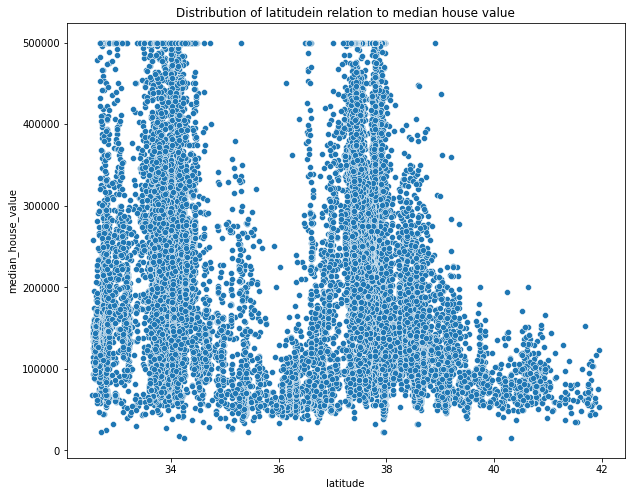

In [145]:
explore(dataset, 'latitude')

NOTES:

1. From the correlation calculations, there is some slightly negative linear relationship with median house value but the graph is not showing it clearly

###### Housing Median Age

| Exploration         | Results      |
|---------------------+--------------|
| Data type of column | float64      |
| Data type group     | Quantitative |



| Exploration    | Results                       |
|----------------+-------------------------------|
| Missing values | 0 missing values out of 20640 |
| Missing values | 0.0%                          |



Distribution of the data:


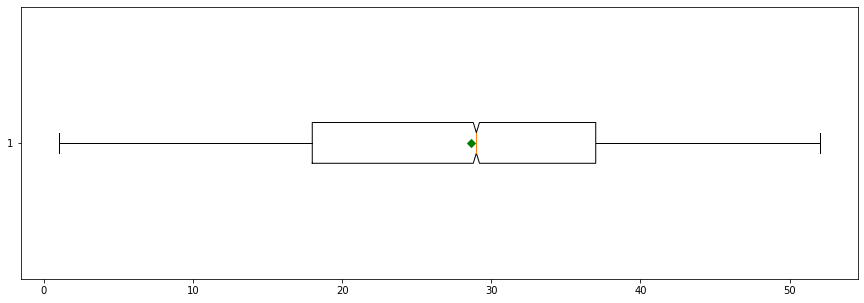



Exploration                     Results
------------------------------  ----------------------------------------
The description of the column:  count    20640.000000
                                mean        28.639486
                                std         12.585558
                                min          1.000000
                                25%         18.000000
                                50%         29.000000
                                75%         37.000000
                                max         52.000000
                                Name: housing_median_age, dtype: float64



Exploration      Results
---------------  --------------------------------------------------------------------------------
The kurtosis is  2.199274400455501
Conclusion:      The distribution is platykurtic. The distribution follows a normal distribution.



Exploration      Results
---------------  ----------------------------------
The skewness is  0.06032625301661101
Conc

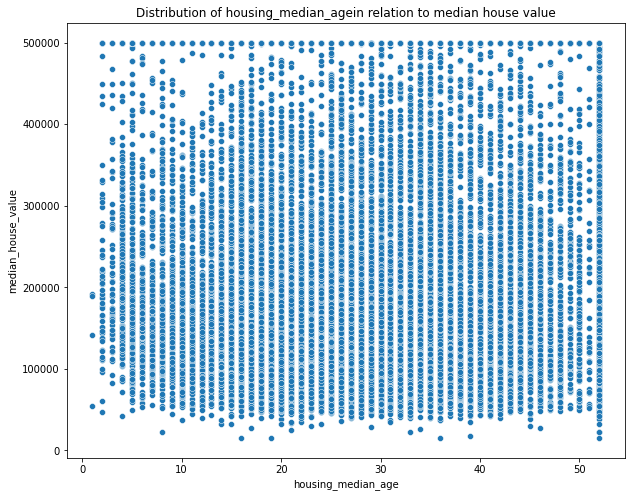

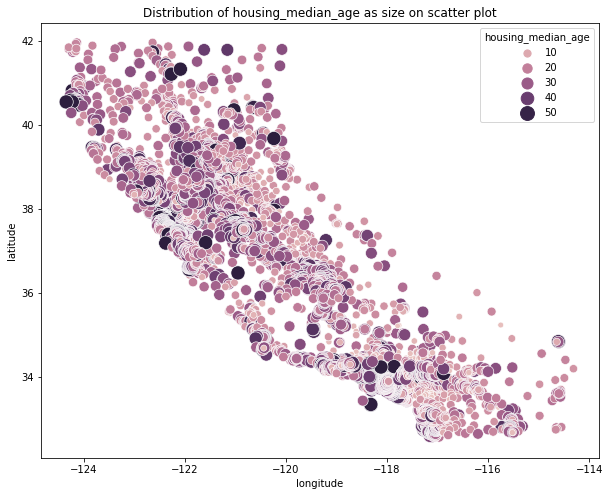

In [151]:
explore(dataset, 'housing_median_age')

###### Total Rooms

| Exploration         | Results      |
|---------------------+--------------|
| Data type of column | float64      |
| Data type group     | Quantitative |



| Exploration    | Results                       |
|----------------+-------------------------------|
| Missing values | 0 missing values out of 20640 |
| Missing values | 0.0%                          |



Distribution of the data:




Exploration                     Results
------------------------------  ---------------------------------
The description of the column:  count    20640.000000
                                mean      2635.763081
                                std       2181.615252
                                min          2.000000
                                25%       1447.750000
                                50%       2127.000000
                                75%       3148.000000
                                max      39320.000000
                                Name: total_rooms, dtype: float64



Exploration      Results
---------------  -------------------------------------------------------------------
The kurtosis is  35.6227320729488
Conclusion:      The distribution is leptokurtic. The distribution has a sharp peak.



Exploration      Results
---------------  ----------------------------------
The skewness is  4.147042038773343
Conclusion:      The distribution has high skew

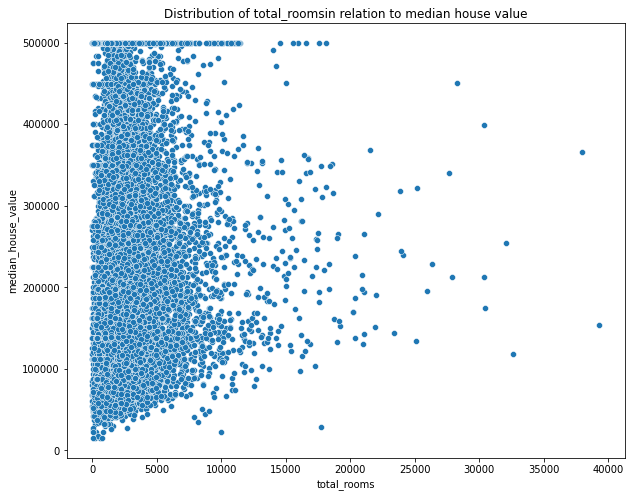

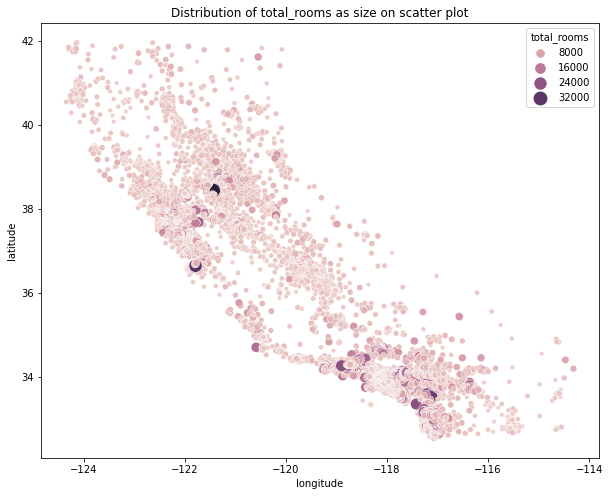

In [152]:
explore(dataset, 'total_rooms')

NOTES:

1. This variable has values in their thousands. What does it mean for a row to have 8000 total rooms?
2. There are some outliers but a majority are around 8000

###### Total bedrooms

| Exploration         | Results      |
|---------------------+--------------|
| Data type of column | float64      |
| Data type group     | Quantitative |



| Exploration    | Results                         |
|----------------+---------------------------------|
| Missing values | 207 missing values out of 20640 |
| Missing values | 1.002906976744186%              |



Distribution of the data:


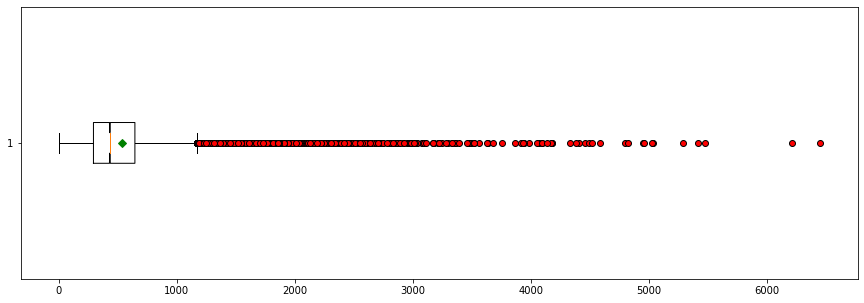



Exploration                     Results
------------------------------  ------------------------------------
The description of the column:  count    20433.000000
                                mean       537.870553
                                std        421.385070
                                min          1.000000
                                25%        296.000000
                                50%        435.000000
                                75%        647.000000
                                max       6445.000000
                                Name: total_bedrooms, dtype: float64



Exploration      Results
---------------  -------------------------------------------------------------------
The kurtosis is  24.97990188245051
Conclusion:      The distribution is leptokurtic. The distribution has a sharp peak.



Exploration      Results
---------------  ----------------------------------
The skewness is  3.45929235876747
Conclusion:      The distribution has hig

In [153]:
explore(dataset, 'total_bedrooms')

NOTES:

1. Can we create a variable that compares bedrooms to the total rooms

###### Population

| Exploration         | Results      |
|---------------------+--------------|
| Data type of column | float64      |
| Data type group     | Quantitative |



| Exploration    | Results                       |
|----------------+-------------------------------|
| Missing values | 0 missing values out of 20640 |
| Missing values | 0.0%                          |



Distribution of the data:




Exploration                     Results
------------------------------  --------------------------------
The description of the column:  count    20640.000000
                                mean      1425.476744
                                std       1132.462122
                                min          3.000000
                                25%        787.000000
                                50%       1166.000000
                                75%       1725.000000
                                max      35682.000000
                                Name: population, dtype: float64



Exploration      Results
---------------  -------------------------------------------------------------------
The kurtosis is  76.53500881922278
Conclusion:      The distribution is leptokurtic. The distribution has a sharp peak.



Exploration      Results
---------------  ----------------------------------
The skewness is  4.93549950885852
Conclusion:      The distribution has high skewne

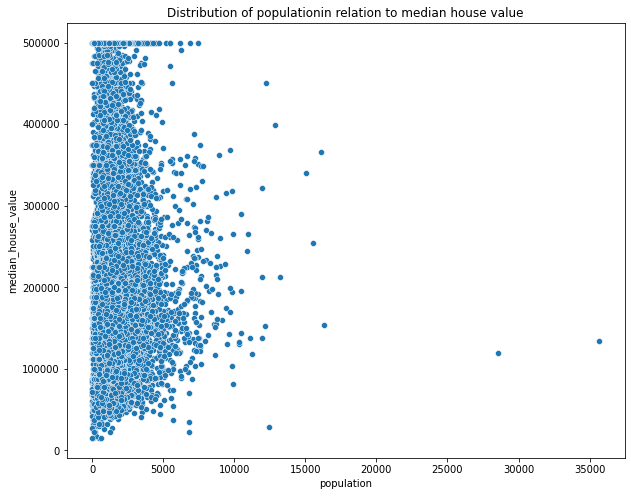

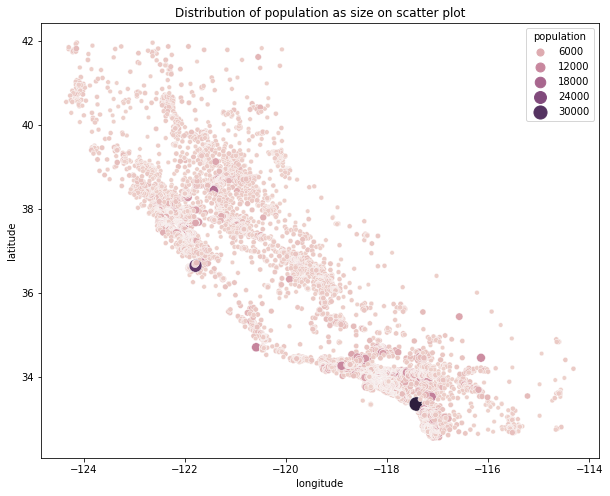

In [154]:
explore(dataset, 'population')

NOTES:

1. Is it possible to bin this into categories such as "low populated", "highly populated" etc

###### Households

| Exploration         | Results      |
|---------------------+--------------|
| Data type of column | float64      |
| Data type group     | Quantitative |



| Exploration    | Results                       |
|----------------+-------------------------------|
| Missing values | 0 missing values out of 20640 |
| Missing values | 0.0%                          |



Distribution of the data:


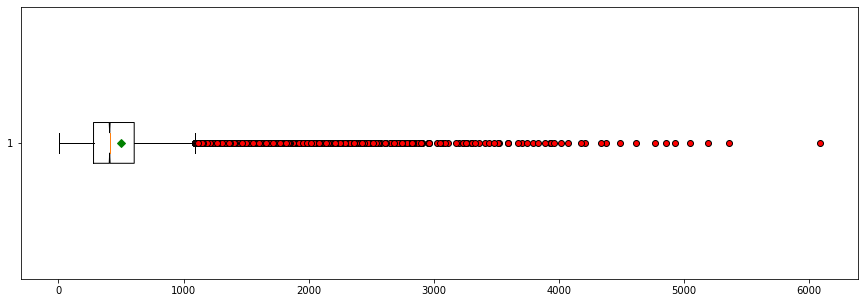



Exploration                     Results
------------------------------  --------------------------------
The description of the column:  count    20640.000000
                                mean       499.539680
                                std        382.329753
                                min          1.000000
                                25%        280.000000
                                50%        409.000000
                                75%        605.000000
                                max       6082.000000
                                Name: households, dtype: float64



Exploration      Results
---------------  -------------------------------------------------------------------
The kurtosis is  25.052354233642966
Conclusion:      The distribution is leptokurtic. The distribution has a sharp peak.



Exploration      Results
---------------  ----------------------------------
The skewness is  3.4101898550856307
Conclusion:      The distribution has high ske

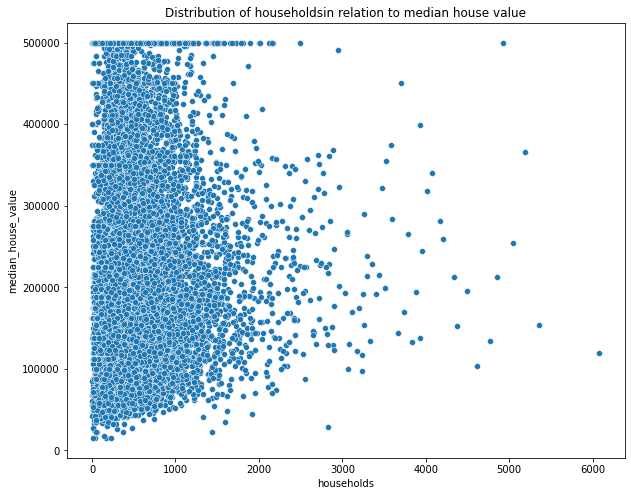

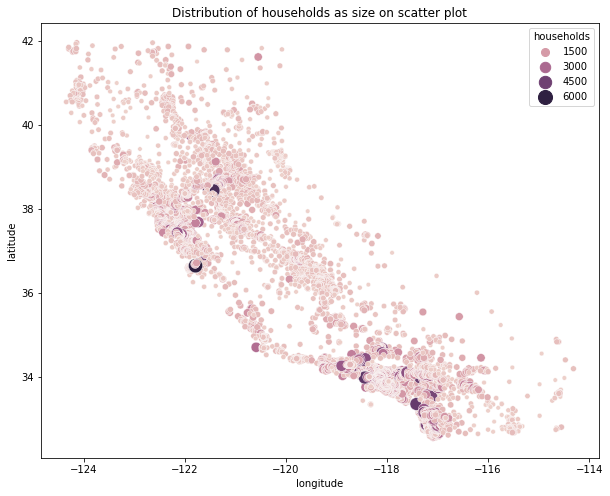

In [155]:
explore(dataset, 'households')

NOTES:

1. Some areas have many households others just one. Does this show that some latitute/longitude have blocks and others free standing houses?

###### Median Income

| Exploration         | Results      |
|---------------------+--------------|
| Data type of column | float64      |
| Data type group     | Quantitative |



| Exploration    | Results                       |
|----------------+-------------------------------|
| Missing values | 0 missing values out of 20640 |
| Missing values | 0.0%                          |



Distribution of the data:


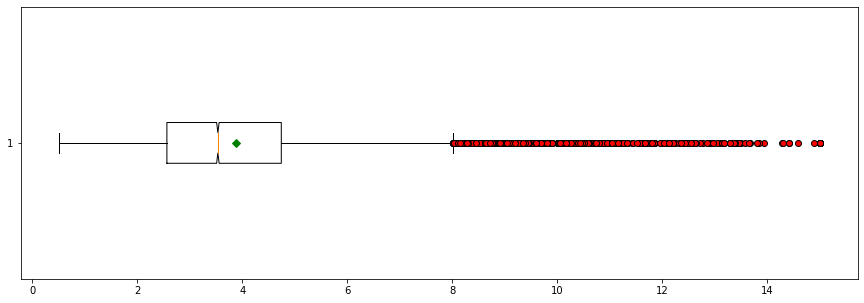



Exploration                     Results
------------------------------  -----------------------------------
The description of the column:  count    20640.000000
                                mean         3.870671
                                std          1.899822
                                min          0.499900
                                25%          2.563400
                                50%          3.534800
                                75%          4.743250
                                max         15.000100
                                Name: median_income, dtype: float64



Exploration      Results
---------------  -------------------------------------------------------------------
The kurtosis is  7.951033760409659
Conclusion:      The distribution is leptokurtic. The distribution has a sharp peak.



Exploration      Results
---------------  ----------------------------------
The skewness is  1.64653702990008
Conclusion:      The distribution has high 

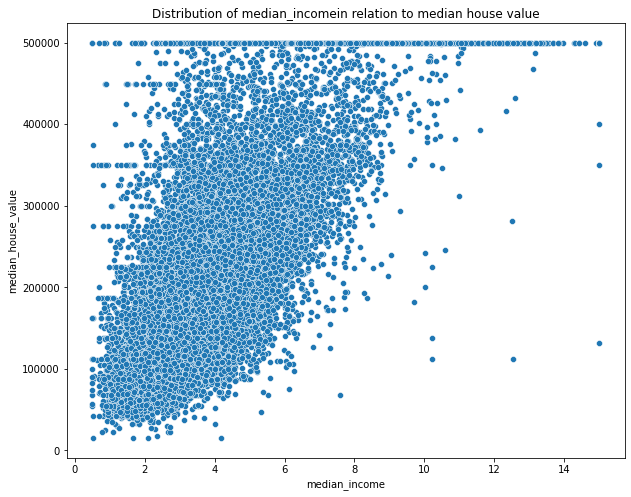

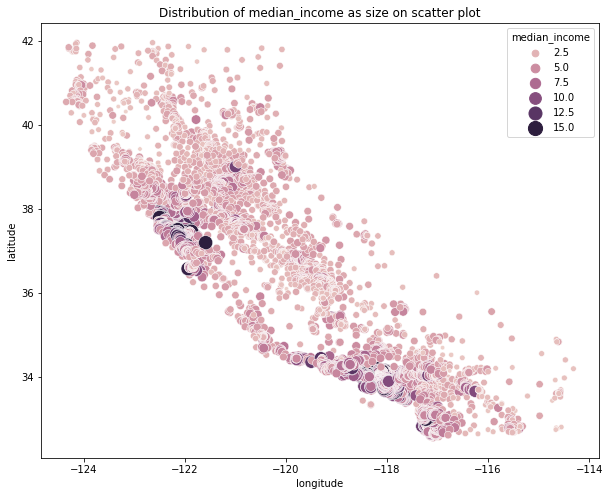

In [156]:
explore(dataset, 'median_income')

NOTES:

1. The median incomes seem to be capped based on the unexpected bar at the beginning and far right
2. They don't have units. Could be in their thousands but cannnot say for sure
3. There are some areas that have large median incomes but a majority is around 2.5 to 5
4. Based on a high correlations ~0.68, the graph confirms the positive relationship between median income and medium house value

###### Ocean proximity

| Exploration         | Results     |
|---------------------+-------------|
| Data type of column | category    |
| Data type group     | Qualitative |



| Exploration    | Results                       |
|----------------+-------------------------------|
| Missing values | 0 missing values out of 20640 |
| Missing values | 0.0%                          |



Distribution of the data:


| Exploration   | Results                             |
|---------------+-------------------------------------|
| Value counts  | <1H OCEAN     9136                  |
|               | INLAND        6551                  |
|               | NEAR OCEAN    2658                  |
|               | NEAR BAY      2290                  |
|               | ISLAND           5                  |
|               | Name: ocean_proximity, dtype: int64 |



| Exploration              | Results                               |
|--------------------------+---------------------------------------|
| Value counts percentages | <1H OCEAN     44.263566               |
|                          | INLAND        31.739341               |
|                          | NEAR OCEAN    12.877907               |
|                          | NEAR BAY      11.094961               |
|                          | ISLAND         0.024225               |
|                          | Name: ocean_proximity, dtype: float64

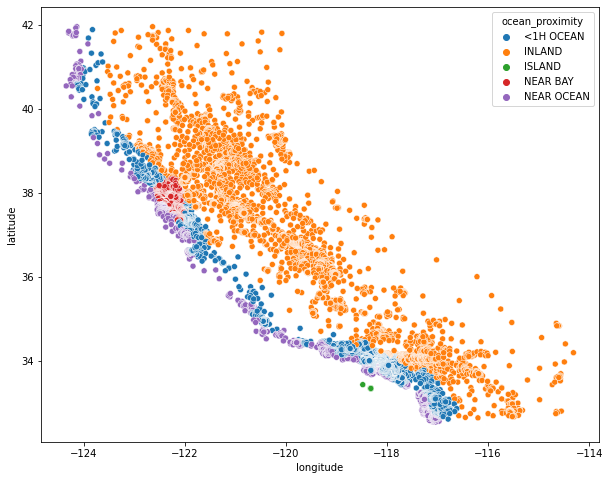

In [159]:
explore(dataset, 'ocean_proximity')

###### [Target]: Median House Value

| Exploration         | Results      |
|---------------------+--------------|
| Data type of column | float64      |
| Data type group     | Quantitative |



| Exploration    | Results                       |
|----------------+-------------------------------|
| Missing values | 0 missing values out of 20640 |
| Missing values | 0.0%                          |



Distribution of the data:


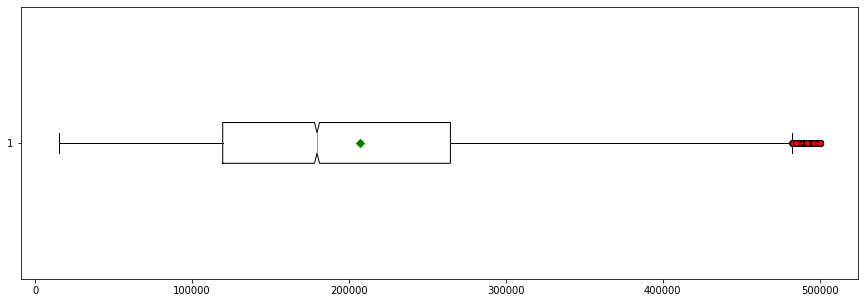



Exploration                     Results
------------------------------  ----------------------------------------
The description of the column:  count     20640.000000
                                mean     206855.816909
                                std      115395.615874
                                min       14999.000000
                                25%      119600.000000
                                50%      179700.000000
                                75%      264725.000000
                                max      500001.000000
                                Name: median_house_value, dtype: float64



Exploration      Results
---------------  -------------------------------------------------------------------
The kurtosis is  3.3275001388119616
Conclusion:      The distribution is leptokurtic. The distribution has a sharp peak.



Exploration      Results
---------------  ---------------------------------------
The skewness is  0.9776922140978416
Conclusion:      

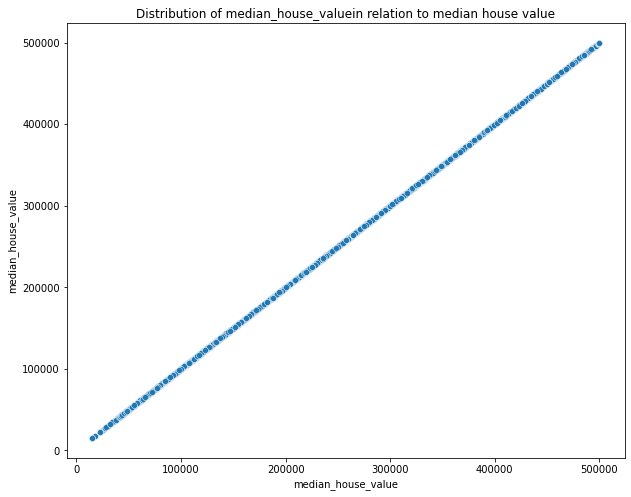

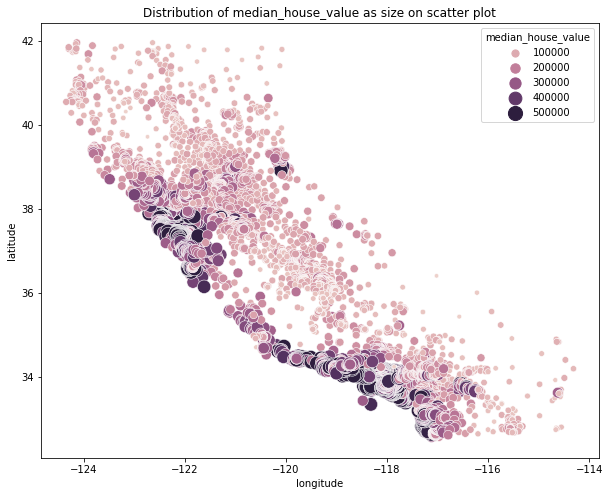

In [160]:
explore(dataset, 'median_house_value')

NOTES:

1. We can see that those close to the ocean are generally more expensive than those more inland
2. This variable has clearly been capped as is seen by the bar at 500 000